In [34]:
import tools
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ser = tools.interface.open_serial_port()

In [ ]:
counts = np.zeros(10)
bins = np.linspace(0, 20000, 11)
for i in range(1000):
    data = tools.interface.read_serial_port(ser) * 0.001
    hist, bins = np.histogram(data, bins=bins)
    counts = counts + hist
    if i % 50 == 0:
        plt.bar(bins[:-1], counts, width=1000)
        plt.show()

In [7]:
ser = tools.interface.open_serial_port()
tools.interface.write_port_data_to_csv(ser, 'test.csv')

KeyboardInterrupt: 

In [115]:
import multiprocessing
import time

def count(ser, shared_list):
    signal = ser.read(1)
    signal += ser.read(ser.inWaiting())
    while True:
        data = tools.interface.read_serial_port(ser)
        shared_list += data[data<=10].tolist()

def g(shared_list):
    while True:
        time.sleep(1)
        if len(shared_list) > 0:
            mean = np.array(shared_list).mean()
        else:
            mean = 0
        print(mean)

manager = multiprocessing.Manager()
shared_list = manager.list()
serial = tools.interface.open_serial_port()
p1 = multiprocessing.Process(name="Read serial", target=count, args=[serial, shared_list])
p2 = multiprocessing.Process(name="Read serial", target=g, args=[shared_list])
p1.start()
p2.start()
p1.join()
p2.join()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
1.875
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.954166666666667
4.9541

Process Read serial:
Process Read serial:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/karlo/miniconda3/envs/Mulan/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/karlo/miniconda3/envs/Mulan/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/karlo/miniconda3/envs/Mulan/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/tmp/ipykernel_4056/855872326.py", line 13, in g
    time.sleep(1)
  File "/home/karlo/miniconda3/envs/Mulan/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_4056/855872326.py", line 8, in count
    data = tools.interface.read_serial_port(ser)
KeyboardInterrupt
  File "/mnt/storage/Projects/Mulan/tools/interface.py", line 34, in read_serial_port
    signal = ser.read(1)
  File "/home/karlo/minicon

KeyboardInterrupt: 

In [97]:
data = tools.interface.read_serial_port(ser)

In [98]:
data

array([12383.75  , 11772.0625, 89058.075 , 28725.4125, 17833.225 ,
       13074.5875, 35037.95  ,  3862.8875])

In [105]:
data[np.logical_and(data>10000, data<20000)]

array([12383.75  , 11772.0625, 17833.225 , 13074.5875])

In [104]:
np.logical_and(data>10000, data<20000)

array([ True,  True, False, False,  True,  True, False, False])

In [45]:
import pandas as pd
import numpy as np
df = pd.read_csv('test_data.csv')

In [46]:
data = np.array(df)

In [47]:
data_smisleno = data[np.logical_and(data<10, data>0.5)]

(array([113., 105., 101.,  89.,  98.,  81., 102.,  66.,  79.,  79.]),
 array([0.5125 , 0.66125, 0.81   , 0.95875, 1.1075 , 1.25625, 1.405  ,
        1.55375, 1.7025 , 1.85125, 2.     ]),
 <BarContainer object of 10 artists>)

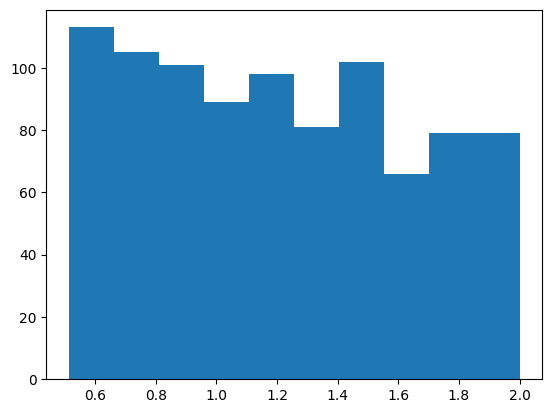

In [48]:
from matplotlib import pyplot as plt
plt.hist(data_smisleno[data_smisleno<=2], bins=10)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

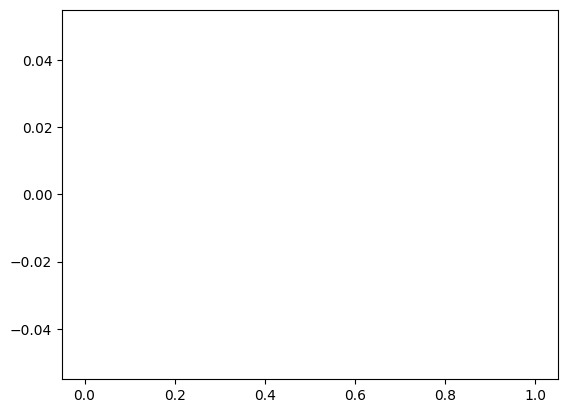

In [49]:
plt.hist(data_smisleno[data_smisleno<=0.5], bins=10)

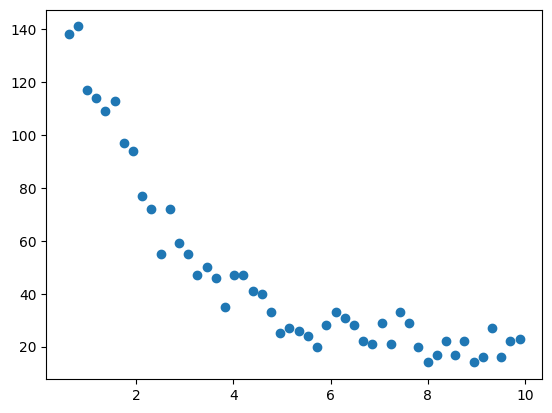

In [70]:
#plt.hist(data_smisleno, bins=50)
counts, bins=np.histogram(data_smisleno, bins=50)
bins = bins[:-1]+ (bins[1]-bins[0])/2
plt.scatter(bins, counts)

In [119]:
def log_likelihood(x):
    def function(parm):
        w = parm[0]
        tau = parm[1]
        t1=0.5
        t2=10
        y = w * 1/tau * 1/(np.exp(-t1/tau)-np.exp(-t2/tau)) * np.exp(-x/tau) + (1-w) * 1/(t2-t1)
        return -np.sum(np.log(y))
    return function


In [122]:
log_likelihood(data_smisleno)([0.61, 2.041])

4728.557320106491

In [121]:
def function1(x, w, tau):
    t1=0.5
    t2=10
    y = w * 1/tau * 1/(np.exp(-t1/tau)-np.exp(-t2/tau)) * np.exp(-x/tau) + (1-w) * 1/(t2-t1)
    #likelihood = np.sum( stats.norm.logpdf(ydata, loc=yPred, scale=sd ) )
    return y

[0.615553   2.04088047]


<function matplotlib.pyplot.show(close=None, block=None)>

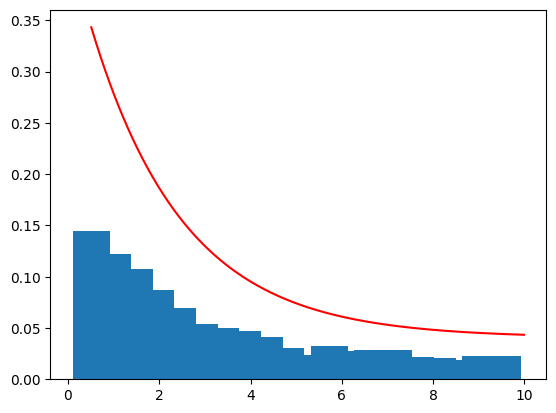

In [144]:
import scipy
popt = scipy.optimize.minimize(log_likelihood(data_smisleno), [0.2,2.2], bounds=[(0,1), (1, 3)])
print (popt.x)
counts, bins = np.histogram(data_smisleno, bins=20)
counts= counts / data_smisleno.size
data_smisleno.sort()
plt.plot(data_smisleno, function1(data_smisleno, popt.x[0], popt.x[1]), color="r")
plt.bar(bins[:-1], counts)
plt.show

In [129]:
data_smisleno.sort()

<function matplotlib.pyplot.show(close=None, block=None)>

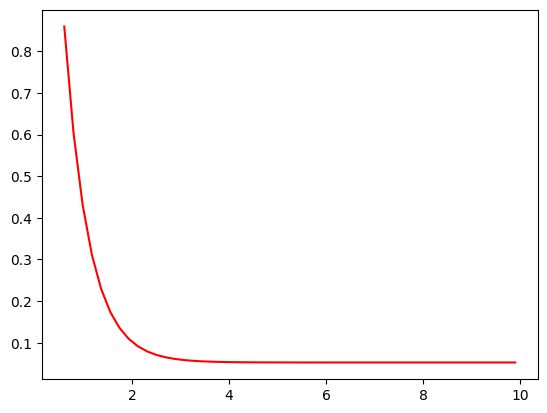

In [63]:
plt.bar(bins, counts)
plt.plot(bins, function(bins, 0.999, 0.5), color="r")
plt.show

In [42]:
print (a.mean())

3.5
